In [3]:
# https://www.kaggle.com/karnikakapoor/customer-segmentation-clustering

#In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. 
#Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. 
#I will divide customers into segments to optimize the significance of each customer to the business. 
#To modify products according to distinct needs and behaviours of the customers. 
#It also helps the business to cater to the concerns of different types of customers.


In [32]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
cs = pd. read_csv("E:/Kaggle Practice/Customer Personality Analysis/marketing_campaign.csv")
cs.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [34]:
cs = pd. read_csv("E:/Kaggle Practice/Customer Personality Analysis/marketing_campaign.csv",sep="\t")
cs.head()

# 위에 출력 결과를 보면 데이터가 한쪽으로 쏠려있는것을 볼수있다.
# 그걸 없애기위해 sep='\t' 이라는 조건을 삽입하면 정렬된 결과를 출력할수있다.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleansing

In [35]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [36]:
cs.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [37]:
cs = cs.dropna()
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [38]:
cs['Dt_Customer'] = pd.to_datetime(cs["Dt_Customer"])
dates = []
for i in cs['Dt_Customer']:
    i = i.date()
    dates.append(i)
print(max(dates))
print(min(dates))

2014-12-06
2012-01-08


In [39]:
# Creating a feature ("Customer_For") of the number of days the customers started to shop in the store 
# relative to the last recorded date

days = []
d1 = max(dates)
for i in dates:
    delta = d1-i
    days.append(delta)
cs["Customer_For"] = days
cs["Customer_For"] = pd.to_numeric(cs['Customer_For'], errors='coerce')

In [40]:
print(cs['Marital_Status'].value_counts())
print(cs['Education'].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [41]:
# Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

agee = 2021
ageee = []
for i in cs['Year_Birth']:
    e = agee-i
    ageee.append(e)
cs['Age'] = ageee
cs.head()


# 이렇게 하면 더 간단
# data["Age"] = 2021-data["Year_Birth"]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,83894400000000000,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,10800000000000000,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,40780800000000000,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,5616000000000000,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,27734400000000000,40


In [42]:
# Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

cs['Spent'] = cs['MntWines'] + cs['MntFruits'] + cs['MntMeatProducts'] + cs['MntFishProducts'] + cs['MntFishProducts'] + cs['MntSweetProducts'] + cs['MntGoldProds']
cs.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,83894400000000000,64,1789
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,10800000000000000,67,29
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,40780800000000000,56,887
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,5616000000000000,37,63
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,27734400000000000,40,468


In [43]:
# Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
9
cs['Living_With'] = cs['Marital_Status'].replace({"Married" : "Partner", "Single" : "Alone", "Together" : "Partner", "Divorced" : "Alone",
                                                 "Widow" : "Alone", "Absurd" : "Alone", "YOLO" : "Alone"})
cs.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,83894400000000000,64,1789,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,10800000000000000,67,29,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,40780800000000000,56,887,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,5616000000000000,37,63,Partner
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,27734400000000000,40,468,Partner


In [44]:
# Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
cs['Children'] = cs['Kidhome'] + cs["Teenhome"]
cs.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,83894400000000000,64,1789,Alone,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,10800000000000000,67,29,Alone,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,40780800000000000,56,887,Partner,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,5616000000000000,37,63,Partner,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,27734400000000000,40,468,Partner,1


In [45]:
# To get further clarity of household, Creating feature indicating "Family_Size"
cs['Family_Size'] = cs['Living_With'].replace({"Alone" : 1, "Partner" : 2}) + cs['Children']
cs['Family_Size']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

In [46]:
# Create a feature "Is_Parent" to indicate parenthood status
# np.where(배열에 대한 조건문, 참일때 값, 거짓일때 값)
# cs.Children이 0보다 크면, 1, 아니면 0을 넣어라

cs['Is_Parent'] = np.where(cs.Children > 0, 1, 0)

In [47]:
cs['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [48]:
# Lastly, I will create three categories in the "Education" by simplifying its value counts.

cs['Education'] = cs['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduation", "Master":"Postgraduate",
                                          "PhD":"Postgraduate"})

In [49]:
cs=cs.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [50]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
cs = cs.drop(to_drop, axis=1)
cs.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduation,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1789,Alone,0,1,0
1,Graduation,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,29,Alone,2,3,1
2,Graduation,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,887,Partner,0,2,0
3,Graduation,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,63,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,468,Partner,1,3,1


In [51]:
cs.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,644.712996,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,639.449894,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,76.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,416.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1107.250000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2621.000000,3.000000,5.000000,1.000000


<Figure size 576x396 with 0 Axes>

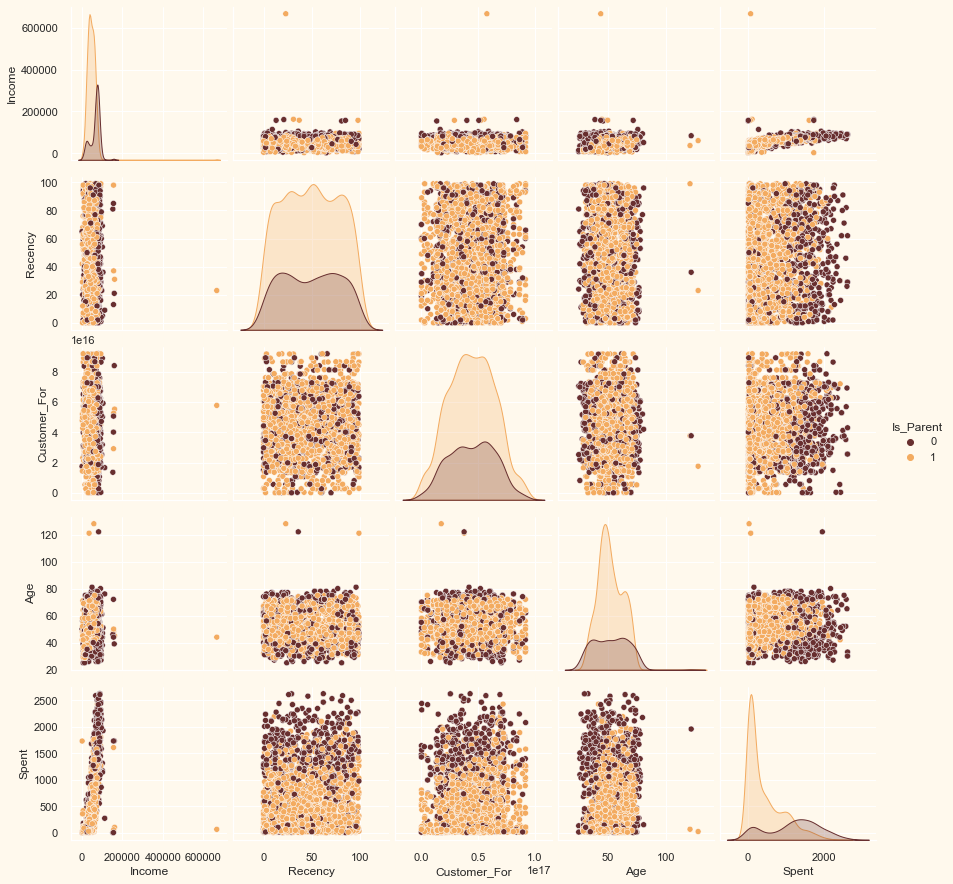

In [52]:
# The above stats show some discrepancies in mean Income and Age and max Income and age.
# Do note that max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.
# I must take a look at the broader view of the data. I will plot some of the selected features.

# To plot some selected features
# Setting up colors prefrences

from matplotlib import colors
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.colors import ListedColormap

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(cs[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [53]:
# Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

cs = cs[(cs['Age']<90)]
cs = cs[(cs['Income']<600000)]

In [54]:
cs.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.064195,0.013562,0.009042,0.150542,4.424926e+16,52.086347,644.916817,0.947559,2.593128,0.714286
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.245156,0.115691,0.094678,0.357683,2.009245e+16,11.701599,639.052266,0.749466,0.906236,0.451856
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,76.000000,0.000000,2.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,416.500000,1.000000,3.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1107.250000,1.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,81.000000,2621.000000,3.000000,5.000000,1.000000


<AxesSubplot:>

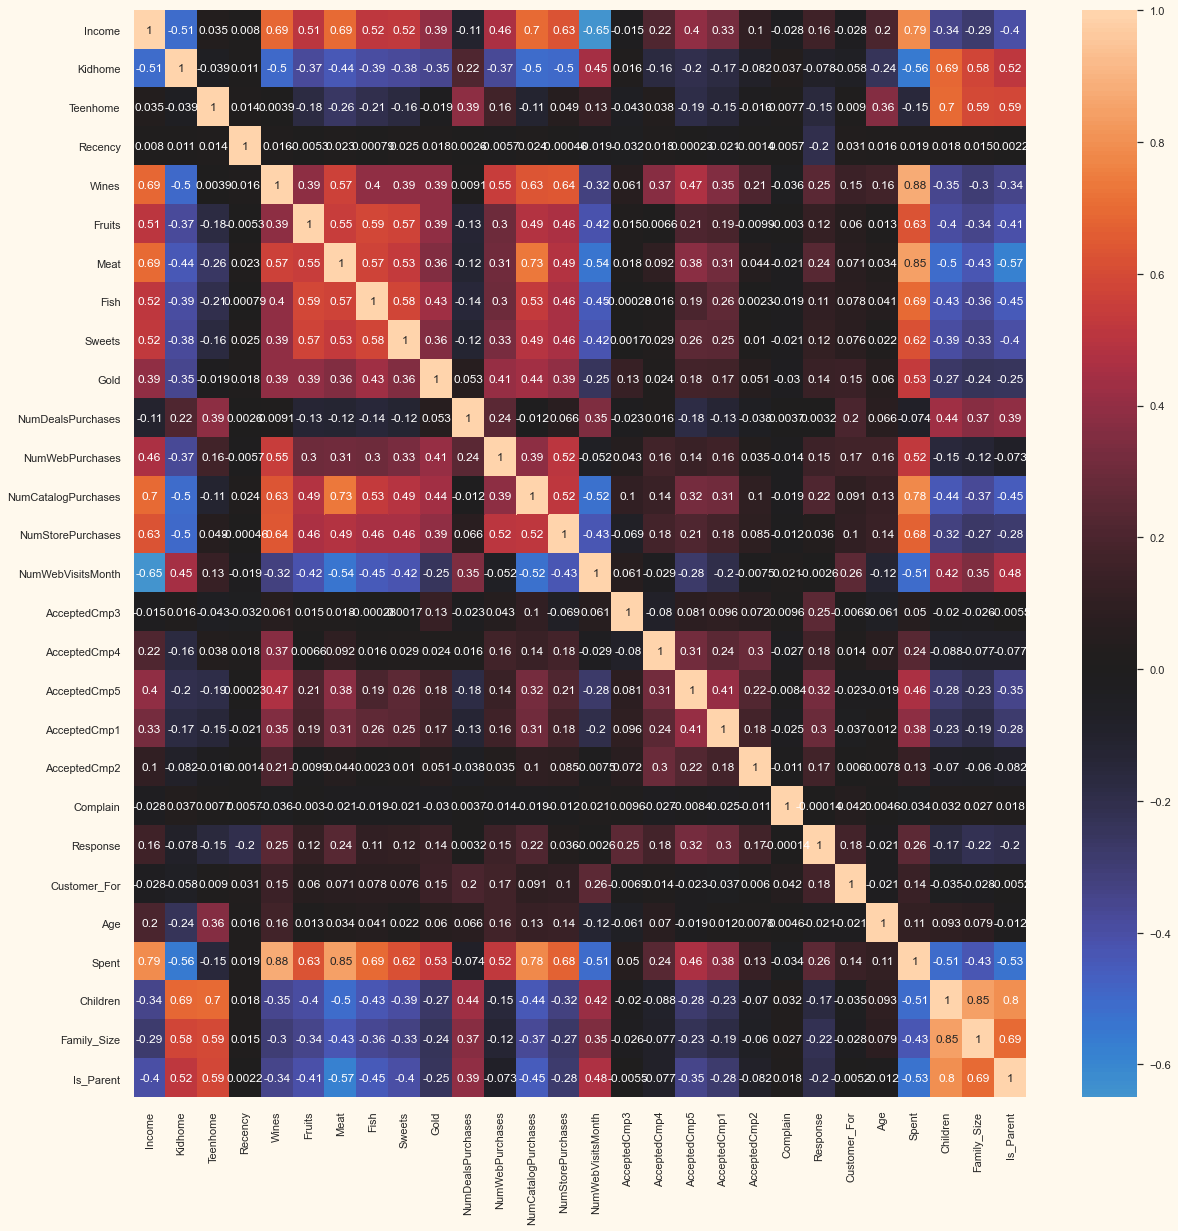

In [55]:
corrmat = cs.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,center=0)

# annot=True 각 셀의 값을 표시해라
# center=0은 0을 검은색으로 놓고 0보다 크면 붉은색, 작으면 푸른색 표시
# cmap은 heatmap 색 표시

## Data Preprocessing

In [ ]:
# The following steps are applied to preprocess the data:

# Label encoding the categorical features
# Scaling the features using the standard scaler
# Creating a subset dataframe for dimensionality reduction

In [56]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [57]:
object_cols = ['Education','Living_With']
le = LabelEncoder()
for i in object_cols:
    cs[i] = cs[[i]].apply(le.fit_transform)
cs.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1789,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,29,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,887,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,63,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,468,1,1,3,1


In [58]:
ds = cs.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns=ds.columns)

scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.790686,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.964015,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.378902,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.910799,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.276905,0.740959,0.069987,0.449070,0.632456


## Dimentionality Reduction

In [ ]:
# there are many factors on the basis of which the final classification will be done. 
# These factors are basically attributes or features. 
# The higher the number of features, the harder it is to work with it. 
# Many of these features are correlated, and hence redundant. 
# This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
# Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

### PCA

In [59]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,-1.304964e-16,1.726567e-17,5.691650e-17
std,2.881260e+00,1.705380e+00,1.221797e+00
min,-5.968205e+00,-4.314215e+00,-3.526875e+00
25%,-2.537020e+00,-1.329233e+00,-8.204010e-01
50%,-7.828173e-01,-1.585217e-01,-2.984498e-02
75%,2.390200e+00,1.243565e+00,8.004255e-01
max,7.505721e+00,6.122154e+00,6.615892e+00


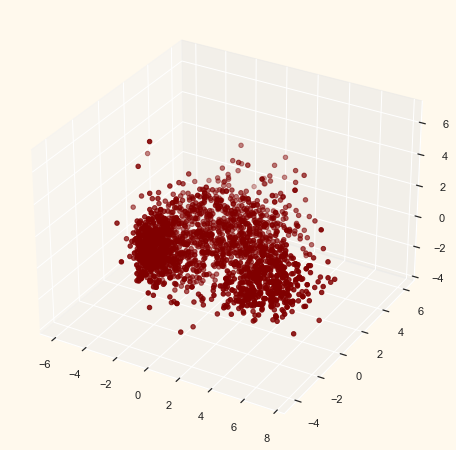

In [60]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c="maroon", marker='o')
plt.show()

## Clustering

In [ ]:
# Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. 
# Agglomerative clustering is a hierarchical clustering method. 
# It involves merging examples until the desired number of clusters is achieved.

# Steps involved in the Clustering:
# Elbow Method to determine the number of clusters to be formed (군집의 개수 결정 방법)
# Clustering via Agglomerative Clustering
# Examining the clusters formed via scatter plot

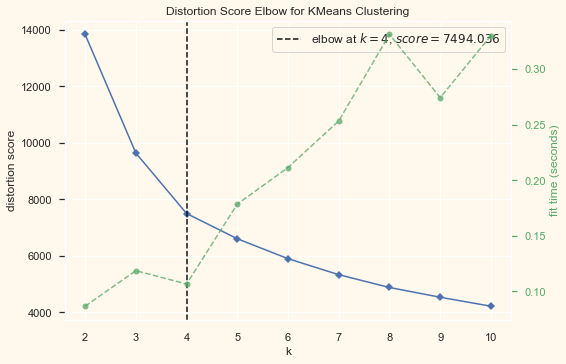

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
# Elbow Method

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [68]:
# The above cell indicates that 4 will be an optimal number of cluster for this data
# Agglomerative Clustering (병합군집) : 각각의 데이터 포인트를 하나의 클러스터로 지정하고, 
# 지정된 개수의 클러스터가 남을때까지 가장 비슷한 두 클러스터를 합쳐 나가는 알고리즘. 

from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Adding the Clusters feature to the original dataframe
cs['Clusters'] = yhat_AC

In [69]:
cs['Clusters']

0       2
1       3
2       2
3       1
4       3
       ..
2235    0
2236    3
2237    2
2238    0
2239    3
Name: Clusters, Length: 2212, dtype: int64

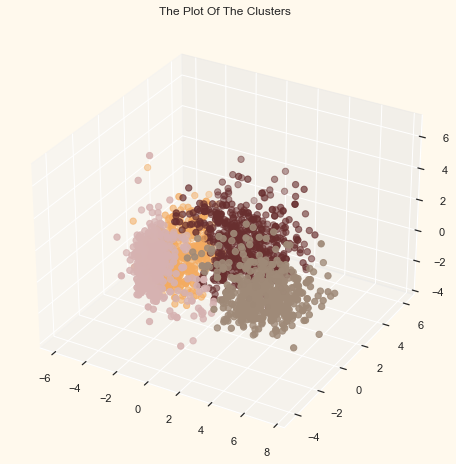

In [70]:
# To examine the clusters formed, let's have look at the 3-D distribution of the clusters
# Plotting the clusters

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x,y,z, s=40, c=PCA_ds['Clusters'], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluating Models

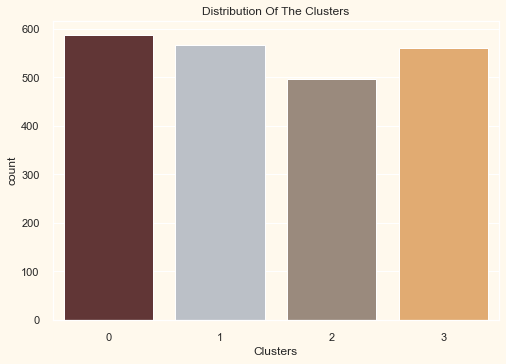

In [71]:
# Let us have a look at the group distribution of clustering

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=cs["Clusters"], palette = pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

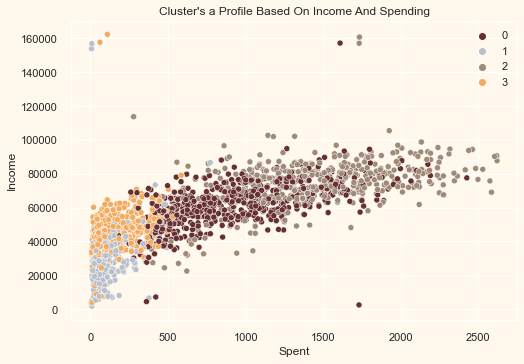

In [72]:
# The clusters seem to be fairly distributed

pl = sns.scatterplot(data = cs, x = cs["Spent"], y = cs["Income"], hue = cs["Clusters"], palette = pal)
pl.set_title("Cluster's a Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
# Income vs Spending plot shows the clusters pattern

# group 0 : high spending & average income
# group 1 : low spending & low income
# group 2 : high spending & high income
# group 3 : low spending & low income(or average income)

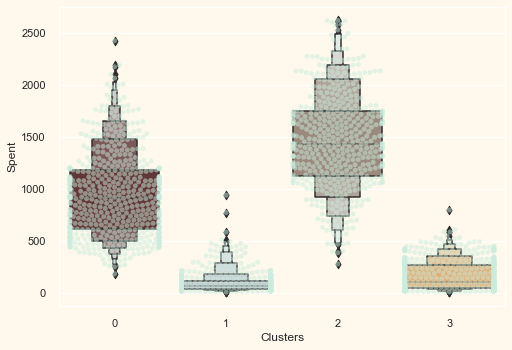

In [74]:
# Let's look at the detailed distribution of clusters as per the various products in the data. 
# Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

plt.figure()
pl = sns.swarmplot(x=cs["Clusters"], y=cs["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=cs["Clusters"], y=cs["Spent"], palette=pal)
plt.show()

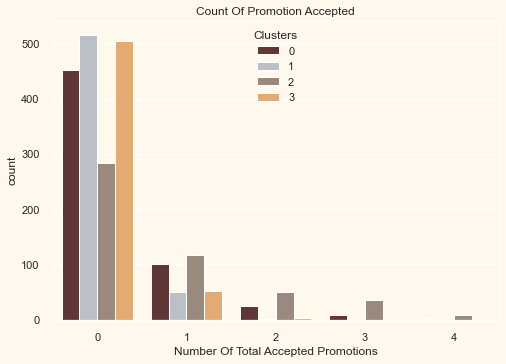

In [75]:
# From the above plot, cluster 2 is our biggest set of clusters 
# Let us explore how did our campaigns do in the past.

#Creating a feature to get a sum of accepted promotions 
cs["Total_Promos"] = cs["AcceptedCmp1"]+ cs["AcceptedCmp2"]+ cs["AcceptedCmp3"]+ cs["AcceptedCmp4"]+ cs["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=cs["Total_Promos"],hue=cs["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()


In [ ]:
# From the above, there has not been an overwhelming response to the campaigns so far. 
# Very few participants overall. Moreover, no one part take in all 5 of them. 
# Perhaps better-targeted and well-planned campaigns are required to boost sales.

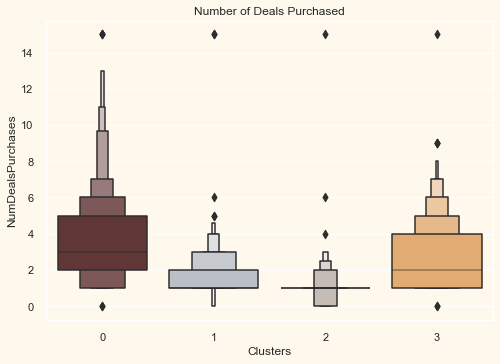

In [76]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=cs["NumDealsPurchases"],x=cs["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

In [ ]:
# Unlike campaigns, the deals offered did well. 
# It has best outcome with cluster 0 and cluster 3. 
# However, our star customers cluster 2 are not much into the deals. 
# Nothing seems to attract cluster 1 overwhelmingly

## Profiling